# Лабораторная работа 5. Очистка данных

In [7]:
# импорт пакетов
import pandas as pd
import random

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('/content/drive/MyDrive/attached/CO2_emission.csv')
df.head(10)

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
5,2021,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,11.3,8.1,9.8,231,7
6,2021,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,10.0,7.2,8.7,205,3
7,2021,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,10.5,7.7,9.2,217,3
8,2021,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,13.5,9.3,11.6,271,3
9,2021,Alfa Romeo,Stelvio,SUV: Small,2.0,4,A8,10.3,8.1,9.3,218,3


In [10]:
df.dtypes

Model_Year                                  int64
Make                                       object
Model                                      object
Vehicle_Class                              object
Engine_Size                               float64
Cylinders                                   int64
Transmission                               object
Fuel_Consumption_in_City(L/100 km)        float64
Fuel_Consumption_in_City_Hwy(L/100 km)    float64
Fuel_Consumption_comb(L/100km)            float64
CO2_Emissions                               int64
Smog_Level                                  int64
dtype: object

In [11]:
df.shape

(935, 12)

In [12]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Model_Year' 'Engine_Size' 'Cylinders'
 'Fuel_Consumption_in_City(L/100 km)'
 'Fuel_Consumption_in_City_Hwy(L/100 km)' 'Fuel_Consumption_comb(L/100km)'
 'CO2_Emissions' 'Smog_Level']


In [13]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Make' 'Model' 'Vehicle_Class' 'Transmission']


## Разброс

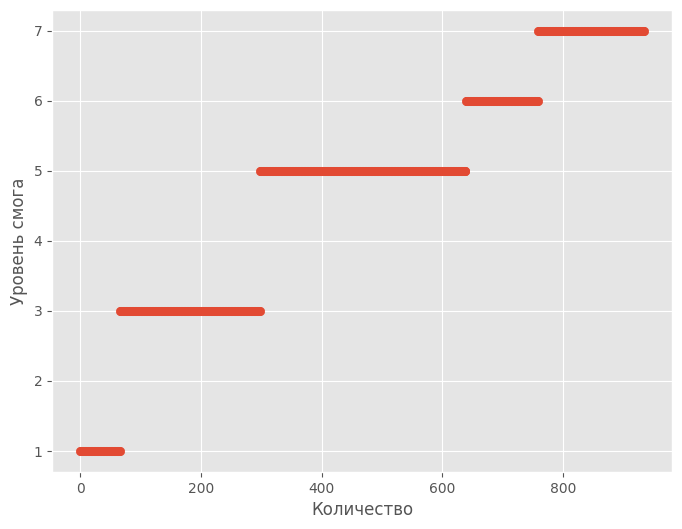

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.Smog_Level.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Уровень смога', fontsize=12)
plt.show()

## Проверка отсутствующих данных


In [15]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


## Процентный список пропущенных данных

In [16]:
df.isnull().sum() * 100 / df.shape[0]

Model_Year                                0.0
Make                                      0.0
Model                                     0.0
Vehicle_Class                             0.0
Engine_Size                               0.0
Cylinders                                 0.0
Transmission                              0.0
Fuel_Consumption_in_City(L/100 km)        0.0
Fuel_Consumption_in_City_Hwy(L/100 km)    0.0
Fuel_Consumption_comb(L/100km)            0.0
CO2_Emissions                             0.0
Smog_Level                                0.0
dtype: float64

Пропущенных данных нет

## Удаление по списку

In [17]:
df_smog = df['Smog_Level'].replace(random.randint(6, 7), np.NaN)
df_corrupt = df
df_corrupt['Smog_Level'] = df_smog
df_corrupt

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3.0
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5.0
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5.0
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,NaN
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5.0


In [18]:
df_corrupt.dtypes

Model_Year                                  int64
Make                                       object
Model                                      object
Vehicle_Class                              object
Engine_Size                               float64
Cylinders                                   int64
Transmission                               object
Fuel_Consumption_in_City(L/100 km)        float64
Fuel_Consumption_in_City_Hwy(L/100 km)    float64
Fuel_Consumption_comb(L/100km)            float64
CO2_Emissions                               int64
Smog_Level                                float64
dtype: object

In [19]:
df_corrupt.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,759.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.198946
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.460545
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,5.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,6.000000


In [20]:
df_corrupt.isnull().sum() * 100 / df.shape[0]

Model_Year                                 0.000000
Make                                       0.000000
Model                                      0.000000
Vehicle_Class                              0.000000
Engine_Size                                0.000000
Cylinders                                  0.000000
Transmission                               0.000000
Fuel_Consumption_in_City(L/100 km)         0.000000
Fuel_Consumption_in_City_Hwy(L/100 km)     0.000000
Fuel_Consumption_comb(L/100km)             0.000000
CO2_Emissions                              0.000000
Smog_Level                                18.823529
dtype: float64

In [21]:
df_del = df_corrupt.dropna()
df_del

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3.0
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6.0
6,2021,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,10.0,7.2,8.7,205,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
928,2021,Volvo,V60 CC T5 AWD,Station wagon: Small,2.0,4,AS8,10.8,7.7,9.4,220,5.0
929,2021,Volvo,XC40 T4 AWD,SUV: Small,2.0,4,AS8,10.7,7.6,9.3,217,5.0
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5.0
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5.0


## Отбрасывание признаков


In [22]:
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class']
df_less = df_del.drop(columns=cols_drop)
df_less

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,9.9,7.0,8.6,199,3.0
1,3.5,6,11.1,10.8,11.0,256,3.0
2,2.0,4,11.0,8.6,9.9,232,6.0
3,2.0,4,11.3,9.1,10.3,242,6.0
6,2.0,4,10.0,7.2,8.7,205,3.0
...,...,...,...,...,...,...,...
928,2.0,4,10.8,7.7,9.4,220,5.0
929,2.0,4,10.7,7.6,9.3,217,5.0
930,2.0,4,10.7,7.7,9.4,219,5.0
931,2.0,4,11.1,8.3,9.9,230,5.0


## Внесение недостающих значений

In [23]:
med = df_corrupt['Smog_Level'].median()
print(med)
df_fill = df_corrupt['Smog_Level'].fillna(med)
df_f = df_corrupt
df_f['Smog_Level'] = df_fill
df_f

5.0


,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3.0
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5.0
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5.0
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,5.0
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5.0


In [24]:
df_f.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.349733
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.352544
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,5.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,6.000000


## Одномерное восстановление признаков

In [25]:
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class']
df_corrupt = df_corrupt.drop(columns=cols_drop)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_corrupt)
df_fill1 = pd.DataFrame(imputer.transform(df_corrupt.loc[:,:]), columns = df_corrupt.columns)
df_fill1

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4.0,9.9,7.0,8.6,199.0,3.0
1,3.5,6.0,11.1,10.8,11.0,256.0,3.0
2,2.0,4.0,11.0,8.6,9.9,232.0,6.0
3,2.0,4.0,11.3,9.1,10.3,242.0,6.0
4,2.0,4.0,11.2,8.0,9.8,230.0,5.0
...,...,...,...,...,...,...,...
930,2.0,4.0,10.7,7.7,9.4,219.0,5.0
931,2.0,4.0,11.1,8.3,9.9,230.0,5.0
932,2.0,4.0,11.7,8.6,10.3,240.0,5.0
933,2.0,4.0,11.5,8.4,10.1,236.0,5.0


In [26]:
df_fill1.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.349733
std,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.352544
min,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,5.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,6.000000


## Многомерное восстановление признаков

In [27]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp = imp.fit(df_corrupt)
df_fill1 = pd.DataFrame(imp.transform(df_corrupt.loc[:,:]), columns = df_fill1.columns)
df_fill1.round(2)

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4.0,9.9,7.0,8.6,199.0,3.0
1,3.5,6.0,11.1,10.8,11.0,256.0,3.0
2,2.0,4.0,11.0,8.6,9.9,232.0,6.0
3,2.0,4.0,11.3,9.1,10.3,242.0,6.0
4,2.0,4.0,11.2,8.0,9.8,230.0,5.0
...,...,...,...,...,...,...,...
930,2.0,4.0,10.7,7.7,9.4,219.0,5.0
931,2.0,4.0,11.1,8.3,9.9,230.0,5.0
932,2.0,4.0,11.7,8.6,10.3,240.0,5.0
933,2.0,4.0,11.5,8.4,10.1,236.0,5.0


In [28]:
df_fill1.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.349733
std,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.352544
min,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,5.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,6.000000


## Выбросы

<Axes: >

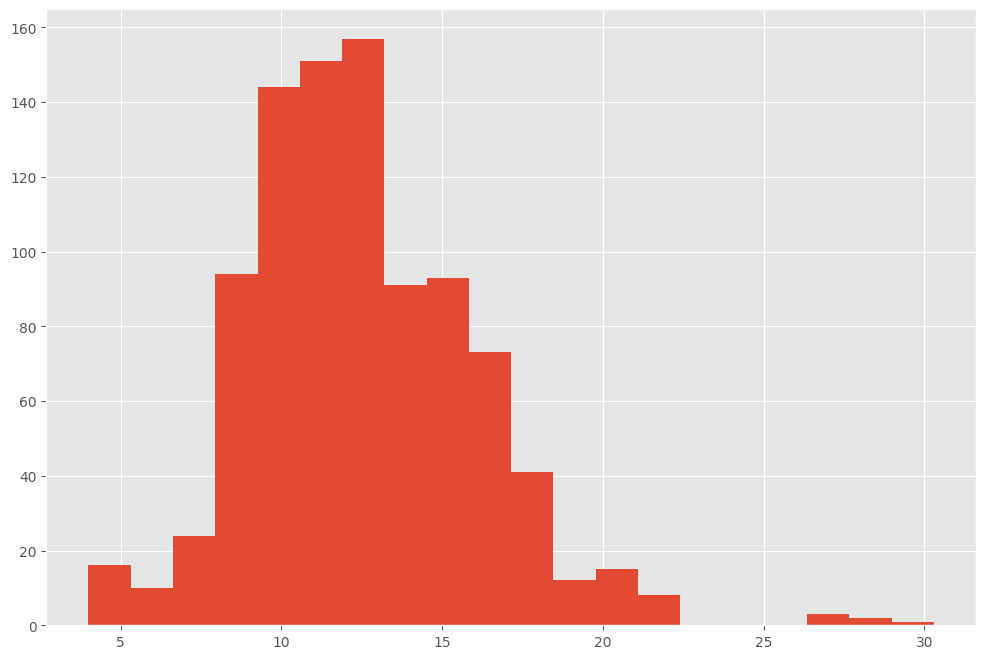

In [29]:
df_fill1['Fuel_Consumption_in_City(L/100 km)'].hist(bins=20)

<Axes: >

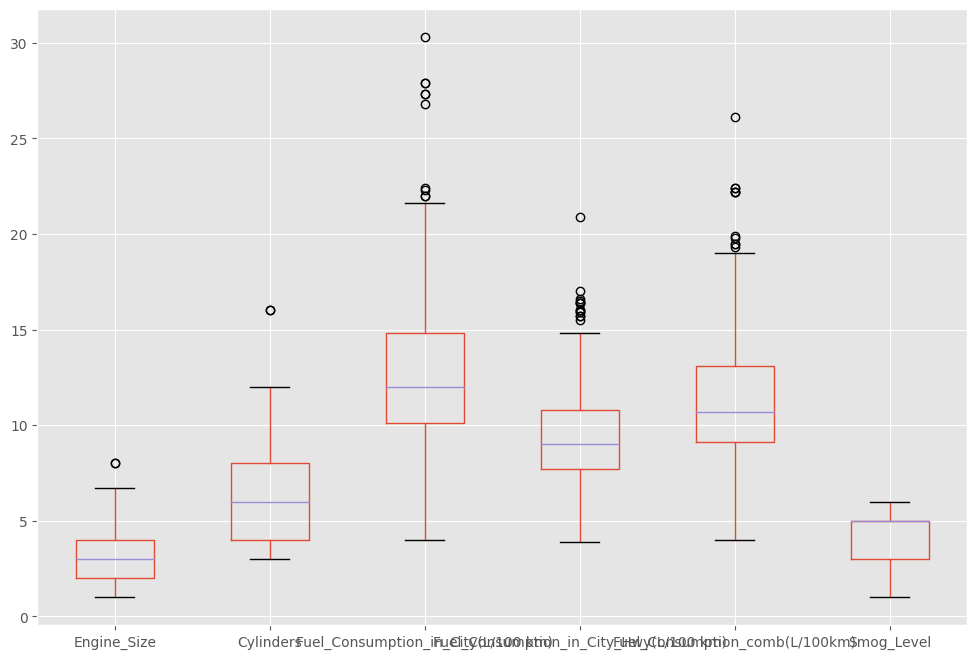

In [40]:
df_fill1.boxplot(column=['Engine_Size','Cylinders', 'Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)','Fuel_Consumption_comb(L/100km)', 'Smog_Level'])

In [45]:
def clean_by(df, column):
  mean, std = df[column].mean(), df[column].std()
  return df[(df[column] < mean + 3 * std) & (df[column] > mean - 3 * std)]

<Axes: >

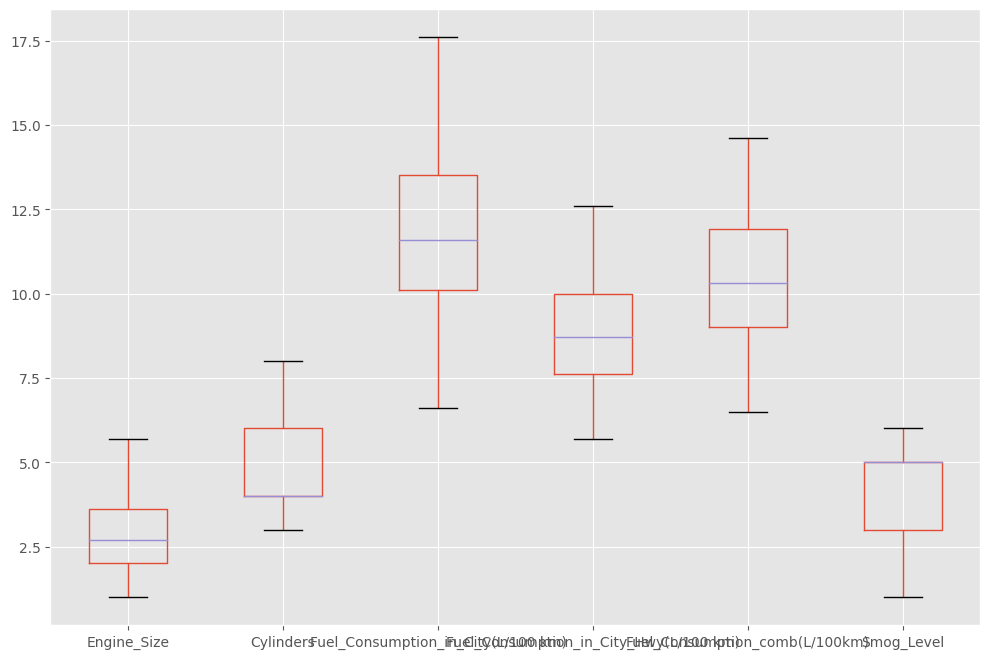

In [47]:
deleted = df_fill1
deleted = clean_by(deleted, 'Engine_Size')
deleted = clean_by(deleted, 'Cylinders')
deleted = clean_by(deleted, 'Fuel_Consumption_in_City(L/100 km)')
deleted = clean_by(deleted, 'Fuel_Consumption_in_City_Hwy(L/100 km)')
deleted = clean_by(deleted, 'Fuel_Consumption_comb(L/100km)')
deleted.boxplot(column=['Engine_Size','Cylinders', 'Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)','Fuel_Consumption_comb(L/100km)', 'Smog_Level'])

На коробчатой диаграмме можем наблюдать выбросы

## Неинформативные признаки

In [ ]:
num_rows = len(df_corrupt.index)
low_information_cols = []

for col in df_corrupt.columns:
    cnts = df_corrupt[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
low_information_cols

Строки с такими признаками отсутствуют

## Дубликаты записей

In [ ]:
key = ['Fuel_Consumption_in_City(L/100 km)', 'Smog_Level', 'CO2_Emissions']
df_new_del = df_del
df_new_del.fillna(-999).groupby(key)['Smog_Level'].count().sort_values(ascending=False).head(20)

df_dedupped2 = df_new_del.drop_duplicates(subset=key)

print(df_new_del.shape)
print(df_dedupped2.shape)
df_dedupped2